### Import Dependency

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

### Data Import

In [2]:
df=pd.read_csv('sps3.csv')
print(df)
df.columns

    Temperature    RD  Grain_size  Hardness     FT        RH
0          1175  93.7       0.800    15.310  5.192  0.729048
1          1200  95.2       0.900    18.500  3.700  0.880952
2          1225  98.2       1.000    20.600  4.500  0.980952
3          1250  99.3       1.600    21.000  3.600  1.000000
4          1300  99.8       4.400    19.200  3.200  0.914286
..          ...   ...         ...       ...    ...       ...
81         1700  99.0       3.268    12.309  2.800  1.414828
82         1700  97.5       3.268    12.191  3.400  1.401264
83         1700  95.5       3.268    11.329  4.000  1.302184
84         1700  98.0       3.268    12.230  5.192  1.405747
85         1700  96.9       3.268    11.799  5.192  1.356207

[86 rows x 6 columns]


Index(['Temperature', 'RD', 'Grain_size', 'Hardness', 'FT', 'RH'], dtype='object')

In [3]:
X=df.drop(['Hardness', 'FT','RH'],axis=1).values
y=df['Hardness'].values

### Scaling and Splitting

In [11]:
scaler = StandardScaler()
scaler.fit(X)  
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Model training

In [14]:
regr = RandomForestRegressor(n_estimators=18, max_depth=10, random_state=0)
regr.fit(X_train,y_train)
y_pred=regr.predict(X_test)

### Accuracy, MSE & MAE

In [15]:
accuracy=r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(accuracy,mse,mae)

0.8323441364204641 2.4854805550725145 1.2076431666755747


### Feature Importance

In [18]:
feature_list = list(['Temperature', 'RD', 'Grain_size'])
feature_imp = pd.Series(regr.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

Temperature    0.430108
Grain_size     0.292061
RD             0.277830
dtype: float64


### Plots

Text(0.5, 1.0, 'Hardness and FT')

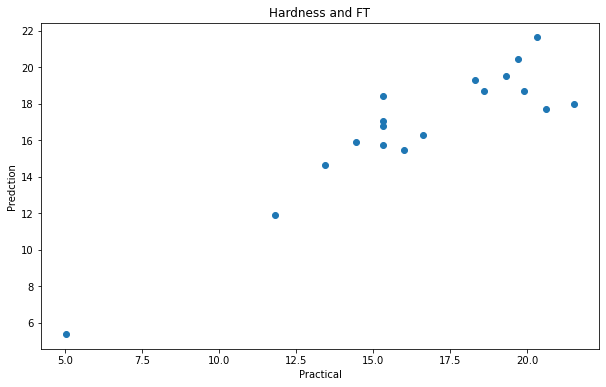

In [16]:
plt.figure(figsize=(10,6))
plt.scatter( y_test, y_pred)
plt.xlabel('Practical')
plt.ylabel('Predction')
plt.title('Hardness and FT')

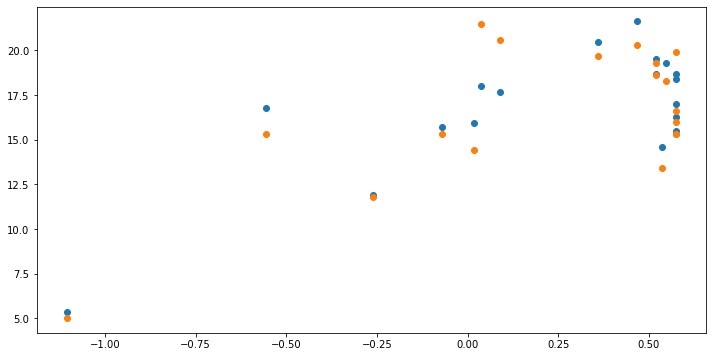

In [17]:
temp=[row[1] for row in X_test]
plt.figure(figsize=(12,6))
plt.scatter(temp , y_pred)
plt.scatter(temp , y_test)